# Adversarial Variational Optimization: Circle benchmark

In [1]:
import cag
import torch
import matplotlib.pyplot as plt

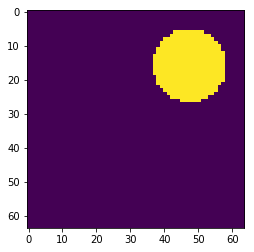

In [2]:
from cag.benchmark.circle import allocate_observations

# Allocate the true observations.
true_radius = .3
true_x = .5
true_y = .5
theta = [true_radius, true_x, true_y]
theta_true, x_o = allocate_observations(theta, 128)

# Show the mean observation.
plt.imshow(x_o.mean(dim=0).numpy())
plt.show()

## AVO

### Autoencoder

In [3]:
class Autoencoder(torch.nn.Module):
    
    def __init__(self, simulator_resolution=64, z_dim=5):
        super(Autoencoder, self).__init__()
        self._simulator_resolution = simulator_resolution
        self._z_dim = z_dim
        self._encoder = torch.nn.Sequential(
            torch.nn.Linear(simulator_resolution ** 2, 400),
            torch.nn.PReLU(),
            torch.nn.Linear(400, 200),
            torch.nn.PReLU(),
            torch.nn.Linear(200, 100),
            torch.nn.PReLU(),
            torch.nn.Linear(100, 50),
            torch.nn.PReLU(),
            torch.nn.Linear(50, z_dim)
        )
        self._decoder = torch.nn.Sequential(
            torch.nn.Linear(z_dim, 50),
            torch.nn.PReLU(),
            torch.nn.Linear(50, 100),
            torch.nn.PReLU(),
            torch.nn.Linear(100, 200),
            torch.nn.PReLU(),
            torch.nn.Linear(200, 400),
            torch.nn.PReLU(),
            torch.nn.Linear(400, simulator_resolution ** 2),
            torch.nn.Sigmoid()
        )
        
    def encode(self, x):
        x = x.view(-1, self._simulator_resolution ** 2)
        z = self._encoder(x)
        
        return z
        
    def forward(self, x):
        z = self.encode(x)
        x_hat = self._decoder(z).view(-1, self._simulator_resolution, self._simulator_resolution)
        
        return x_hat, z
    
autoencoder = Autoencoder()

### Discriminator

In [4]:
class Discriminator(torch.nn.Module):
    
    def __init__(self, z_dim=5):
        super(Discriminator, self).__init__()
        self._z_dim = z_dim
        num_hidden = 20
        self._model = torch.nn.Sequential(
            torch.nn.Linear(5, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.PReLU(),
            torch.nn.Linear(num_hidden, 1),
            torch.nn.Sigmoid()
        )
        
    def forward(self, x):
        x = x.view(-1, self._z_dim)
        y_hat = self._model(x)
        
        return y_hat
    
    
discriminator = Discriminator()

### Simulator

In [5]:
from cag.benchmark.circle import CircleSimulator as Simulator

simulator = Simulator()

### Proposal

In [6]:
from cag.proposal import MultivariateNormalProposal

mean = torch.zeros(3)
sigma = torch.eye(3)
proposal = MultivariateNormalProposal(mean, sigma)

### Inference

In [ ]:
from cag.method import SingleObservationAdversarialVariationalOptimization as SAVO

discriminator = Discriminator()
avo = SAVO(simulator, autoencoder, discriminator, proposal)

In [ ]:
proposal = avo.infer(x_o, num_steps=5000)

print(proposal._mu)

tensor([-0.0099,  0.0099, -0.0099], requires_grad=True)
tensor([-0.0199,  0.0008,  0.0001], requires_grad=True)
tensor([-0.0101, -0.0092,  0.0098], requires_grad=True)
tensor([-0.0039, -0.0166,  0.0020], requires_grad=True)
tensor([-0.0082, -0.0181, -0.0002], requires_grad=True)
tensor([-0.0078, -0.0178, -0.0007], requires_grad=True)
tensor([-0.0078, -0.0180, -0.0013], requires_grad=True)
tensor([-0.0082, -0.0180, -0.0004], requires_grad=True)
tensor([-0.0086, -0.0192, -0.0016], requires_grad=True)
tensor([-0.0040, -0.0201, -0.0038], requires_grad=True)
tensor([-0.0049, -0.0218, -0.0056], requires_grad=True)
tensor([-0.0047, -0.0222, -0.0092], requires_grad=True)
tensor([-0.0115, -0.0251, -0.0096], requires_grad=True)
tensor([-0.0179, -0.0303, -0.0164], requires_grad=True)
tensor([-0.0163, -0.0315, -0.0211], requires_grad=True)
tensor([-0.0178, -0.0292, -0.0174], requires_grad=True)
tensor([-0.0190, -0.0287, -0.0193], requires_grad=True)
tensor([-0.0129, -0.0239, -0.0101], requires_gra

tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires_grad=True)
tensor([nan, nan, nan], requires

In [ ]:
print(proposal._mu)